In [99]:
### Yadeesh.T
### Mathiyazhagan.A

In [100]:
#Importing the necessary Libraries

In [101]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV,train_test_split as tts
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

In [102]:
#Importing the dataset

In [103]:
df=pd.read_csv(r"/content/DATATHON_EVENT_DATASET.csv")
df.sample(5)

,Time,Transaction_Type,Amount,Origin_ID,Initial_Origin_Balance,Final_Origin_Balance,Destination_ID,Initial_Destination_Balance,Final_Destination_Balance,Fraud,Expected_Fraud
43019,20,PAYMENT,7390.50,C1633373471,0.00,0.00,M768030900,0.00,0.00,No,No
7135,130,CASH_OUT,115571.77,C1990530716,264492.83,148921.06,C1875540277,339802.11,455373.88,No,NaN
13483,18,PAYMENT,8017.75,C852167543,0.00,0.00,M1062806767,0.00,0.00,No,No
39417,182,CASH_OUT,223374.25,C605440947,505.00,0.00,C24307959,4742.77,228117.02,No,No
41498,407,CASH_OUT,318733.85,C1038213289,0.00,0.00,C282209878,1236357.83,1555091.68,No,No


In [104]:
# Data analysis ,data cleaning and data preprocessing

In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58150 entries, 0 to 58149
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Time                         58150 non-null  int64  
 1   Transaction_Type             58150 non-null  object 
 2   Amount                       58150 non-null  float64
 3   Origin_ID                    58150 non-null  object 
 4   Initial_Origin_Balance       58150 non-null  float64
 5   Final_Origin_Balance         58150 non-null  float64
 6   Destination_ID               58150 non-null  object 
 7   Initial_Destination_Balance  58150 non-null  float64
 8   Final_Destination_Balance    58150 non-null  float64
 9   Fraud                        58150 non-null  object 
 10  Expected_Fraud               53500 non-null  object 
dtypes: float64(5), int64(1), object(5)
memory usage: 4.9+ MB


In [106]:
df.describe()

,Time,Amount,Initial_Origin_Balance,Final_Origin_Balance,Initial_Destination_Balance,Final_Destination_Balance
count,58150.000000,5.815000e+04,5.815000e+04,5.815000e+04,5.815000e+04,5.815000e+04
mean,260.806569,3.613641e+05,9.203617e+05,7.352785e+05,1.013537e+06,1.225832e+06
std,161.090714,1.163212e+06,2.937414e+06,2.747510e+06,3.387899e+06,3.711043e+06
min,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,157.000000,1.625524e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,253.000000,9.645477e+04,2.251500e+04,0.000000e+00,6.510836e+04,1.897881e+05
75%,354.000000,2.558266e+05,2.213379e+05,8.931140e+04,8.190887e+05,1.107696e+06
max,743.000000,6.988673e+07,5.958504e+07,4.958504e+07,2.362305e+08,2.367265e+08


In [107]:
df=df.drop(["Time","Origin_ID"],axis="columns")

In [108]:
df=df.drop(["Destination_ID"],axis="columns")

In [109]:
df.head(5)

,Transaction_Type,Amount,Initial_Origin_Balance,Final_Origin_Balance,Initial_Destination_Balance,Final_Destination_Balance,Fraud,Expected_Fraud
0,CASH_OUT,183806.32,19391.00,0.00,382572.19,566378.51,No,No
1,PAYMENT,521.37,0.00,0.00,0.00,0.00,No,No
2,PAYMENT,3478.18,19853.00,16374.82,0.00,0.00,No,No
3,PAYMENT,1716.05,5769.17,4053.13,0.00,0.00,No,No
4,CASH_IN,253129.93,1328499.49,1581629.42,2713220.48,2460090.55,No,No


In [110]:
def classify_fraud(row):   # this function does the work which fills the null values in them
    if pd.isna(row['Expected_Fraud']):
        if (row["Amount"]):
            return 'Yes'
        else:
            return 'No'
    return row['Expected_Fraud']

df['Expected_Fraud'] = df.apply(classify_fraud, axis=1)

In [111]:
df.Expected_Fraud.isnull().value_counts()

,count
Expected_Fraud,
False,58150


In [112]:
df.Transaction_Type.unique()

array(['CASH_OUT', 'PAYMENT', 'CASH_IN', 'TRANSFER', 'DEBIT',
       'CASH_OUUUT', 'Trans_fer'], dtype=object)

In [113]:
df['Transaction_Type'] = df['Transaction_Type'].replace({    # replace the unwanted errors like mispelled names
    'CASH_OUUUT': 'CASH_OUT',
    'Trans_fer': 'TRANSFER'
})

In [114]:
from sklearn.preprocessing import LabelEncoder      # Conversion of the objects to the int
le=LabelEncoder()
df.Transaction_Type=le.fit_transform(df.Transaction_Type)
df.Fraud=le.fit_transform(df.Fraud)
df.Expected_Fraud=le.fit_transform(df.Expected_Fraud)

In [115]:
from scipy.stats import zscore   # outlier prediction

df['Z-Score'] = zscore(df['Amount'])
outliers = df[(df['Z-Score'] > 3) | (df['Z-Score'] < -3)]
df_cleaned = df[(df['Z-Score'] <= 3) & (df['Z-Score'] >= -3)]
df = df_cleaned.drop(columns=['Z-Score'])


In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 57090 entries, 0 to 58149
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Transaction_Type             57090 non-null  int64  
 1   Amount                       57090 non-null  float64
 2   Initial_Origin_Balance       57090 non-null  float64
 3   Final_Origin_Balance         57090 non-null  float64
 4   Initial_Destination_Balance  57090 non-null  float64
 5   Final_Destination_Balance    57090 non-null  float64
 6   Fraud                        57090 non-null  int64  
 7   Expected_Fraud               57090 non-null  int64  
dtypes: float64(5), int64(3)
memory usage: 3.9 MB


In [117]:
# Train Test data spliting

In [118]:
x=df.drop("Fraud",axis="columns")
y=df.Fraud

In [119]:
x_tra,x_tes,y_tra,y_tes=tts(df.drop("Fraud",axis="columns"),df.Fraud,test_size=0.2,random_state=0)
x_tra.shape,x_tes.shape

((45672, 7), (11418, 7))

In [120]:
scaler = StandardScaler()   # scaling of the data
x_tra = scaler.fit_transform(x_tra)
x_tes = scaler.transform(x_tes)

smote = SMOTE(random_state=42)
x_tra_resampled, y_tra_resampled = smote.fit_resample(x_tra, y_tra)

In [121]:
# Model implimetation

In [122]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [123]:
gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)  # ML model
gb.fit(x_tra, y_tra)



GradientBoostingClassifier(random_state=42)

In [124]:
# Model Metrics

In [125]:
y_pred = gb.predict(x_tes)

accuracy = accuracy_score(y_tes, y_pred)
print(f"Accuracy: {accuracy:}")

print("Classification Report:")
print(classification_report(y_tes, y_pred))

Accuracy: 0.9935190050796987
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      9980
           1       0.97      0.98      0.97      1438

    accuracy                           0.99     11418
   macro avg       0.98      0.99      0.99     11418
weighted avg       0.99      0.99      0.99     11418



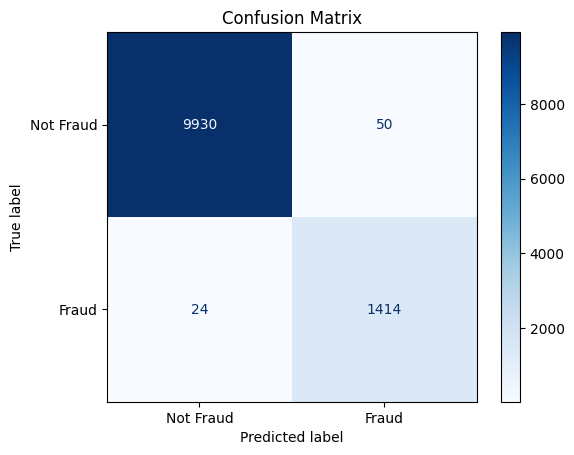

In [126]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay  # confusion metrics

conf_matrix = confusion_matrix(y_tes, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix,
                              display_labels=['Not Fraud', 'Fraud'])

disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix')
plt.show()


# 1.Data cleaning including missing values, outliers and multicollinearity.

In [127]:
""" The data cleaning is done as their were some missing values in the expected_fraud column.
    The outliers is detected in the amount so we used the zscore to overcome that"""

' The data cleaning is done as their were some missing values in the expected_fraud column.\n    The outliers is detected in the amount so we used the zscore to overcome that'

# 2.Describe your fraud detection model in elaboration.

In [128]:
""" Gradient Boosting builds a powerful model by iteratively correcting the errors of previous models using decision trees, and it is known for its high predictive performance.
    this is a  Ensemble learning technique used for classification and regression.
    To create a strong predictive model by combining multiple weak learners (typically decision trees) into one robust model."""


' Gradient Boosting builds a powerful model by iteratively correcting the errors of previous models using decision trees, and it is known for its high predictive performance.\n    this is a  Ensemble learning technique used for classification and regression.\n    To create a strong predictive model by combining multiple weak learners (typically decision trees) into one robust model.'

# 3.How did you select variables to be included in the model?

In [129]:
""" Here we selected the variable by taking the factors which are contributing the output like we have eliminated the factors like time ,Id .
    The variables like amount , transaction amount,expected_fraud"""

' Here we selected the variable by taking the factors which are contributing the output like we have eliminated the factors like time ,Id .\n    The variables like amount , transaction amount,expected_fraud'

# 4.Demonstrate the performance of the model by using the best set of tools.

In [130]:
""" The performance are demonstrated by tools in sklearn lib
    The tools are like Classification report and Confusion matrix"""

' The performance are demonstrated by tools in sklearn lib \n    The tools are like Classification report and Confusion matrix'

# 5.What are the key factors that predict fraudulent customers?

In [131]:
""" the major factors are amount,Transaction amt and expected_fraud """

' the major factors are amount,Transaction amt and expected_fraud '

In [136]:
# for test dataset

In [141]:
dft=pd.read_csv(r"/content/DATATHON_Test.csv")

In [144]:
dft=dft.drop(["Time","Origin_ID"],axis="columns")

In [145]:
dft=dft.drop(["Destination_ID"],axis="columns")

In [149]:
def classify_fraud(row):   # this function does the work which fills the null values in them
    if pd.isna(row['Expected_Fraud']):
        if (row["Amount"]):
            return 'Yes'
        else:
            return 'No'
    return row['Expected_Fraud']

dft['Expected_Fraud'] = dft.apply(classify_fraud, axis=1)

In [148]:
dft['Transaction_Type'] = dft['Transaction_Type'].replace({    # replace the unwanted errors like mispelled names
    'CASH_OUUUT': 'CASH_OUT',
    'Trans_fer': 'TRANSFER'
})

In [150]:
from sklearn.preprocessing import LabelEncoder      # Conversion of the objects to the int
le=LabelEncoder()
dft.Transaction_Type=le.fit_transform(dft.Transaction_Type)
dft.Fraud=le.fit_transform(dft.Fraud)
dft.Expected_Fraud=le.fit_transform(dft.Expected_Fraud)

In [151]:
from scipy.stats import zscore   # outlier prediction

dft['Z-Score'] = zscore(dft['Amount'])
outliers = dft[(dft['Z-Score'] > 3) | (dft['Z-Score'] < -3)]
df_cleanedt = dft[(dft['Z-Score'] <= 3) & (dft['Z-Score'] >= -3)]
dft = df_cleanedt.drop(columns=['Z-Score'])

In [153]:
x=dft.drop("Fraud",axis="columns")
y=dft.Fraud

In [154]:
scaler = StandardScaler()   # scaling of the data
x = scaler.fit_transform(x)
x= scaler.transform(x)

smote = SMOTE(random_state=42)
x, y = smote.fit_resample(x_tra, y_tra)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [156]:
y_pre= gb.predict(x)

accuracy = accuracy_score(y, y_pre)
print(f"Accuracy: {accuracy:}")

print("Classification Report:")
print(classification_report(y, y_pre))

Accuracy: 0.9894984836712699
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99     39899
           1       0.99      0.98      0.99     39899

    accuracy                           0.99     79798
   macro avg       0.99      0.99      0.99     79798
weighted avg       0.99      0.99      0.99     79798



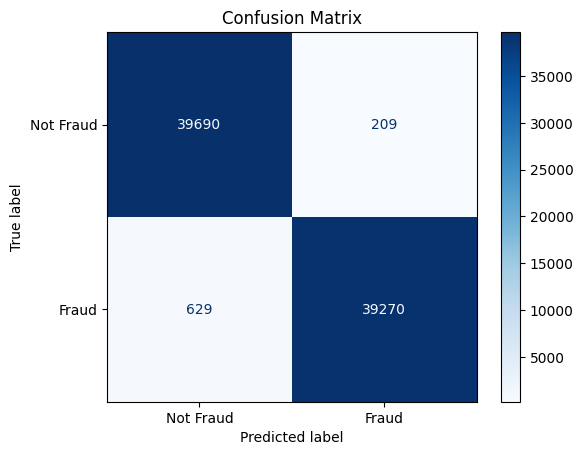

In [158]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay  # confusion metrics

conf_matrix = confusion_matrix(y, y_pre)

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix,
                              display_labels=['Not Fraud', 'Fraud'])

disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix')
plt.show()


In [161]:
import pickle

with open('trained.pkl', 'wb') as file:
    pickle.dump(gb, file)